In [69]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Spark and Hadoop Initialization 

In [1]:
# Initialize SparkSession
spark = SparkSession.builder \
    .master("spark://spark-master:7077") \
    .appName("Insurance Fraud Detection") \
    .getOrCreate()


In [2]:
spark

In [7]:
# Path to the CSV in HDFS
hdfs_path = "hdfs://namenode:9000/user/data/insurance_claims.csv"

# Read the CSV into a DataFrame
df = spark.read.csv(hdfs_path, header=True, inferSchema=True).toPandas()

# Data Exploration

In [8]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,None
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,None
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,None
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,None
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,None
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,None
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,None
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,None


In [11]:
# we can see some missing values denoted by '?' so lets replace missing values with np.nan

df.replace('?', np.nan, inplace = True)

In [12]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int32  
 1   age                          1000 non-null   int32  
 2   policy_number                1000 non-null   int32  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int32  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int32  
 9   insured_zip                  1000 non-null   int32  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Data Preprocessing

In [14]:
# missing values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [15]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [16]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

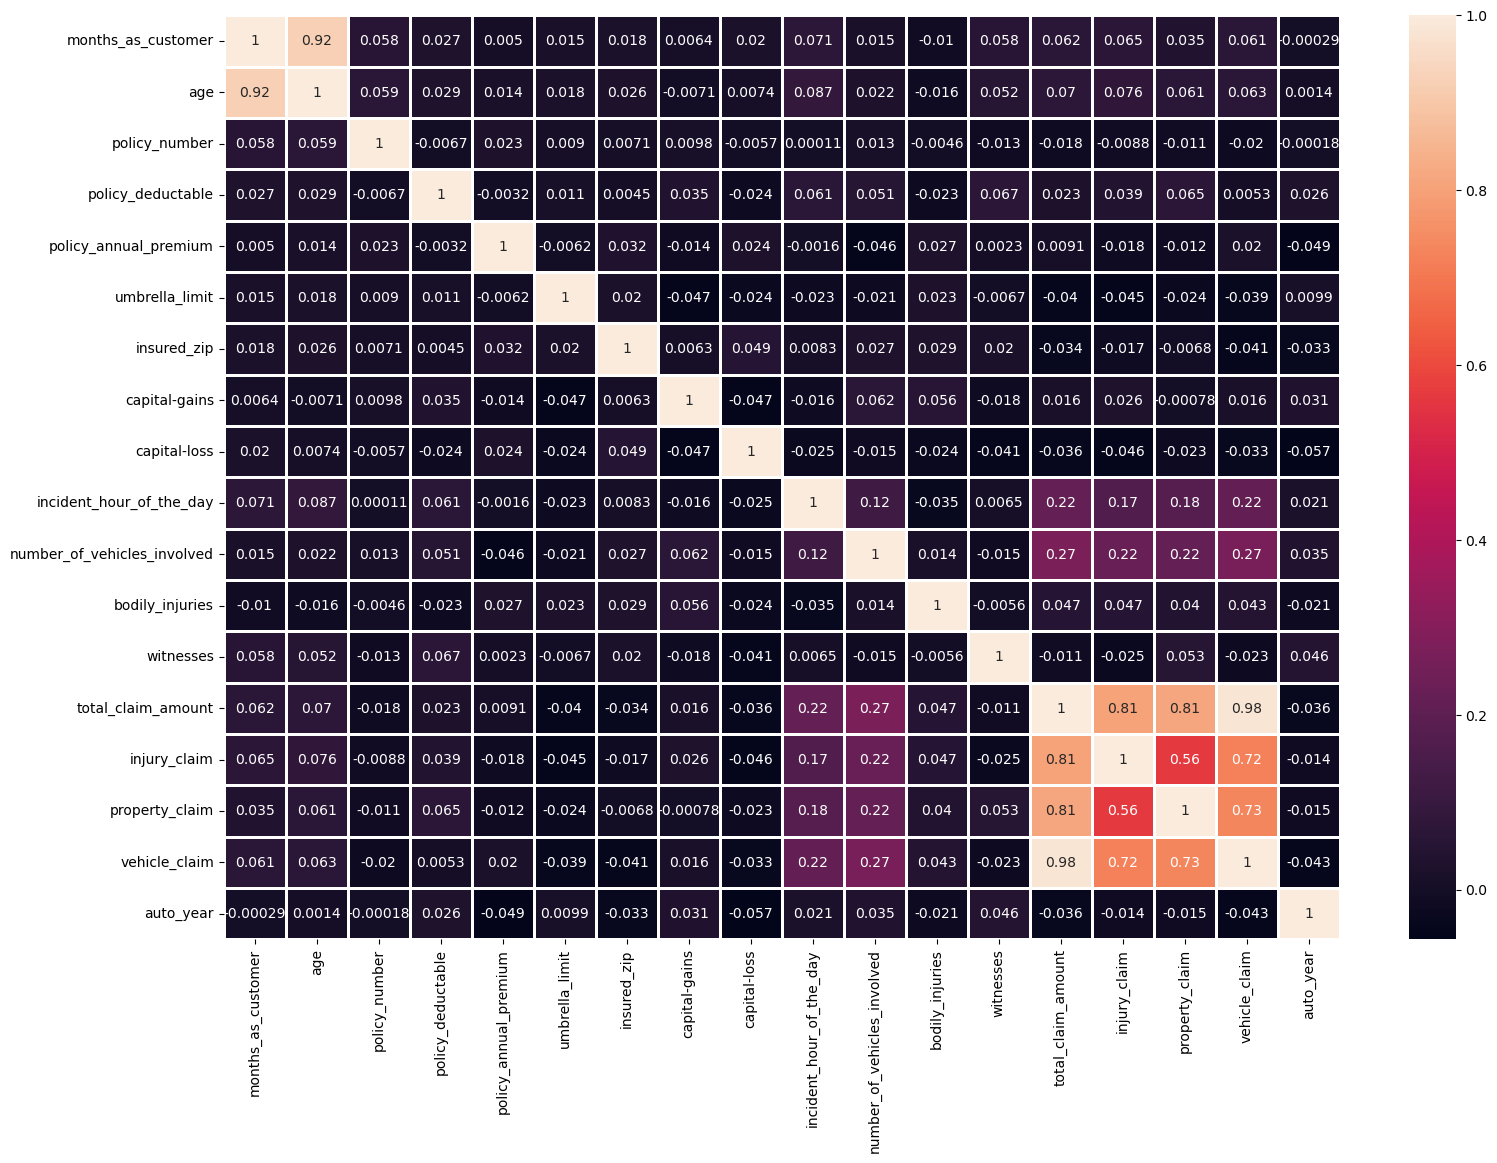

In [24]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(data=corr, annot=True, fmt='.2g', linewidth=1)
plt.show()


In [25]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [26]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


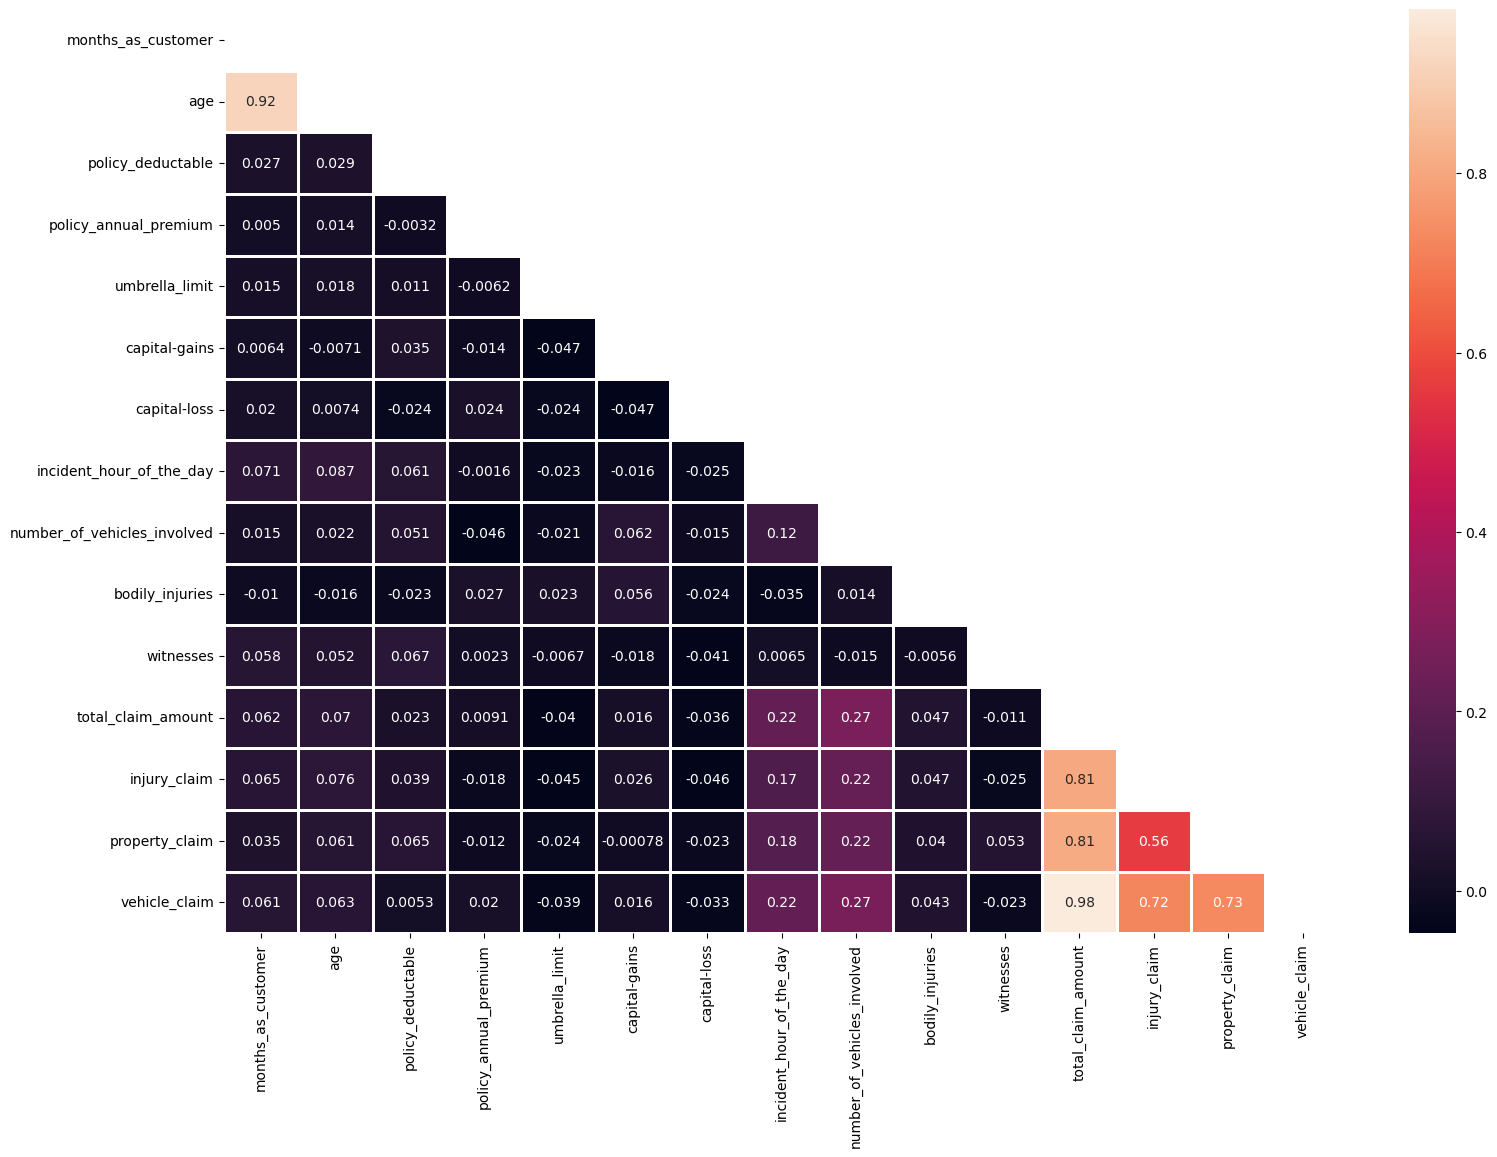

In [29]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

**From the above plot, we can see that there is high correlation between `age` and `months_as_customer`.We will drop the "Age" column. Also there is high correlation between `total_clam_amount`, `injury_claim`, `property_claim`, `vehicle_claim` as total claim is the sum of all others. So we will drop the total claim column.**

In [30]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [31]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [32]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO


In [33]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [35]:
cat_df = pd.get_dummies(cat_df, drop_first=True)
cat_df = cat_df.astype(int)  # Convert boolean values to 0 and 1
cat_df.head()


,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [37]:
# combining the Numerical and Categorical dataframes to get the final dataset
X = pd.concat([numeric_df, cat_df], axis = 1)
X.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,1,0,0,0,0,0,0,1,1,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,1,0,0,0,0,0,1,0,0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,1,0,0,0,0,0,1,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,0,0,0,0,0,0,1,0,0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,1,0,0,0,1,0,0,0,0


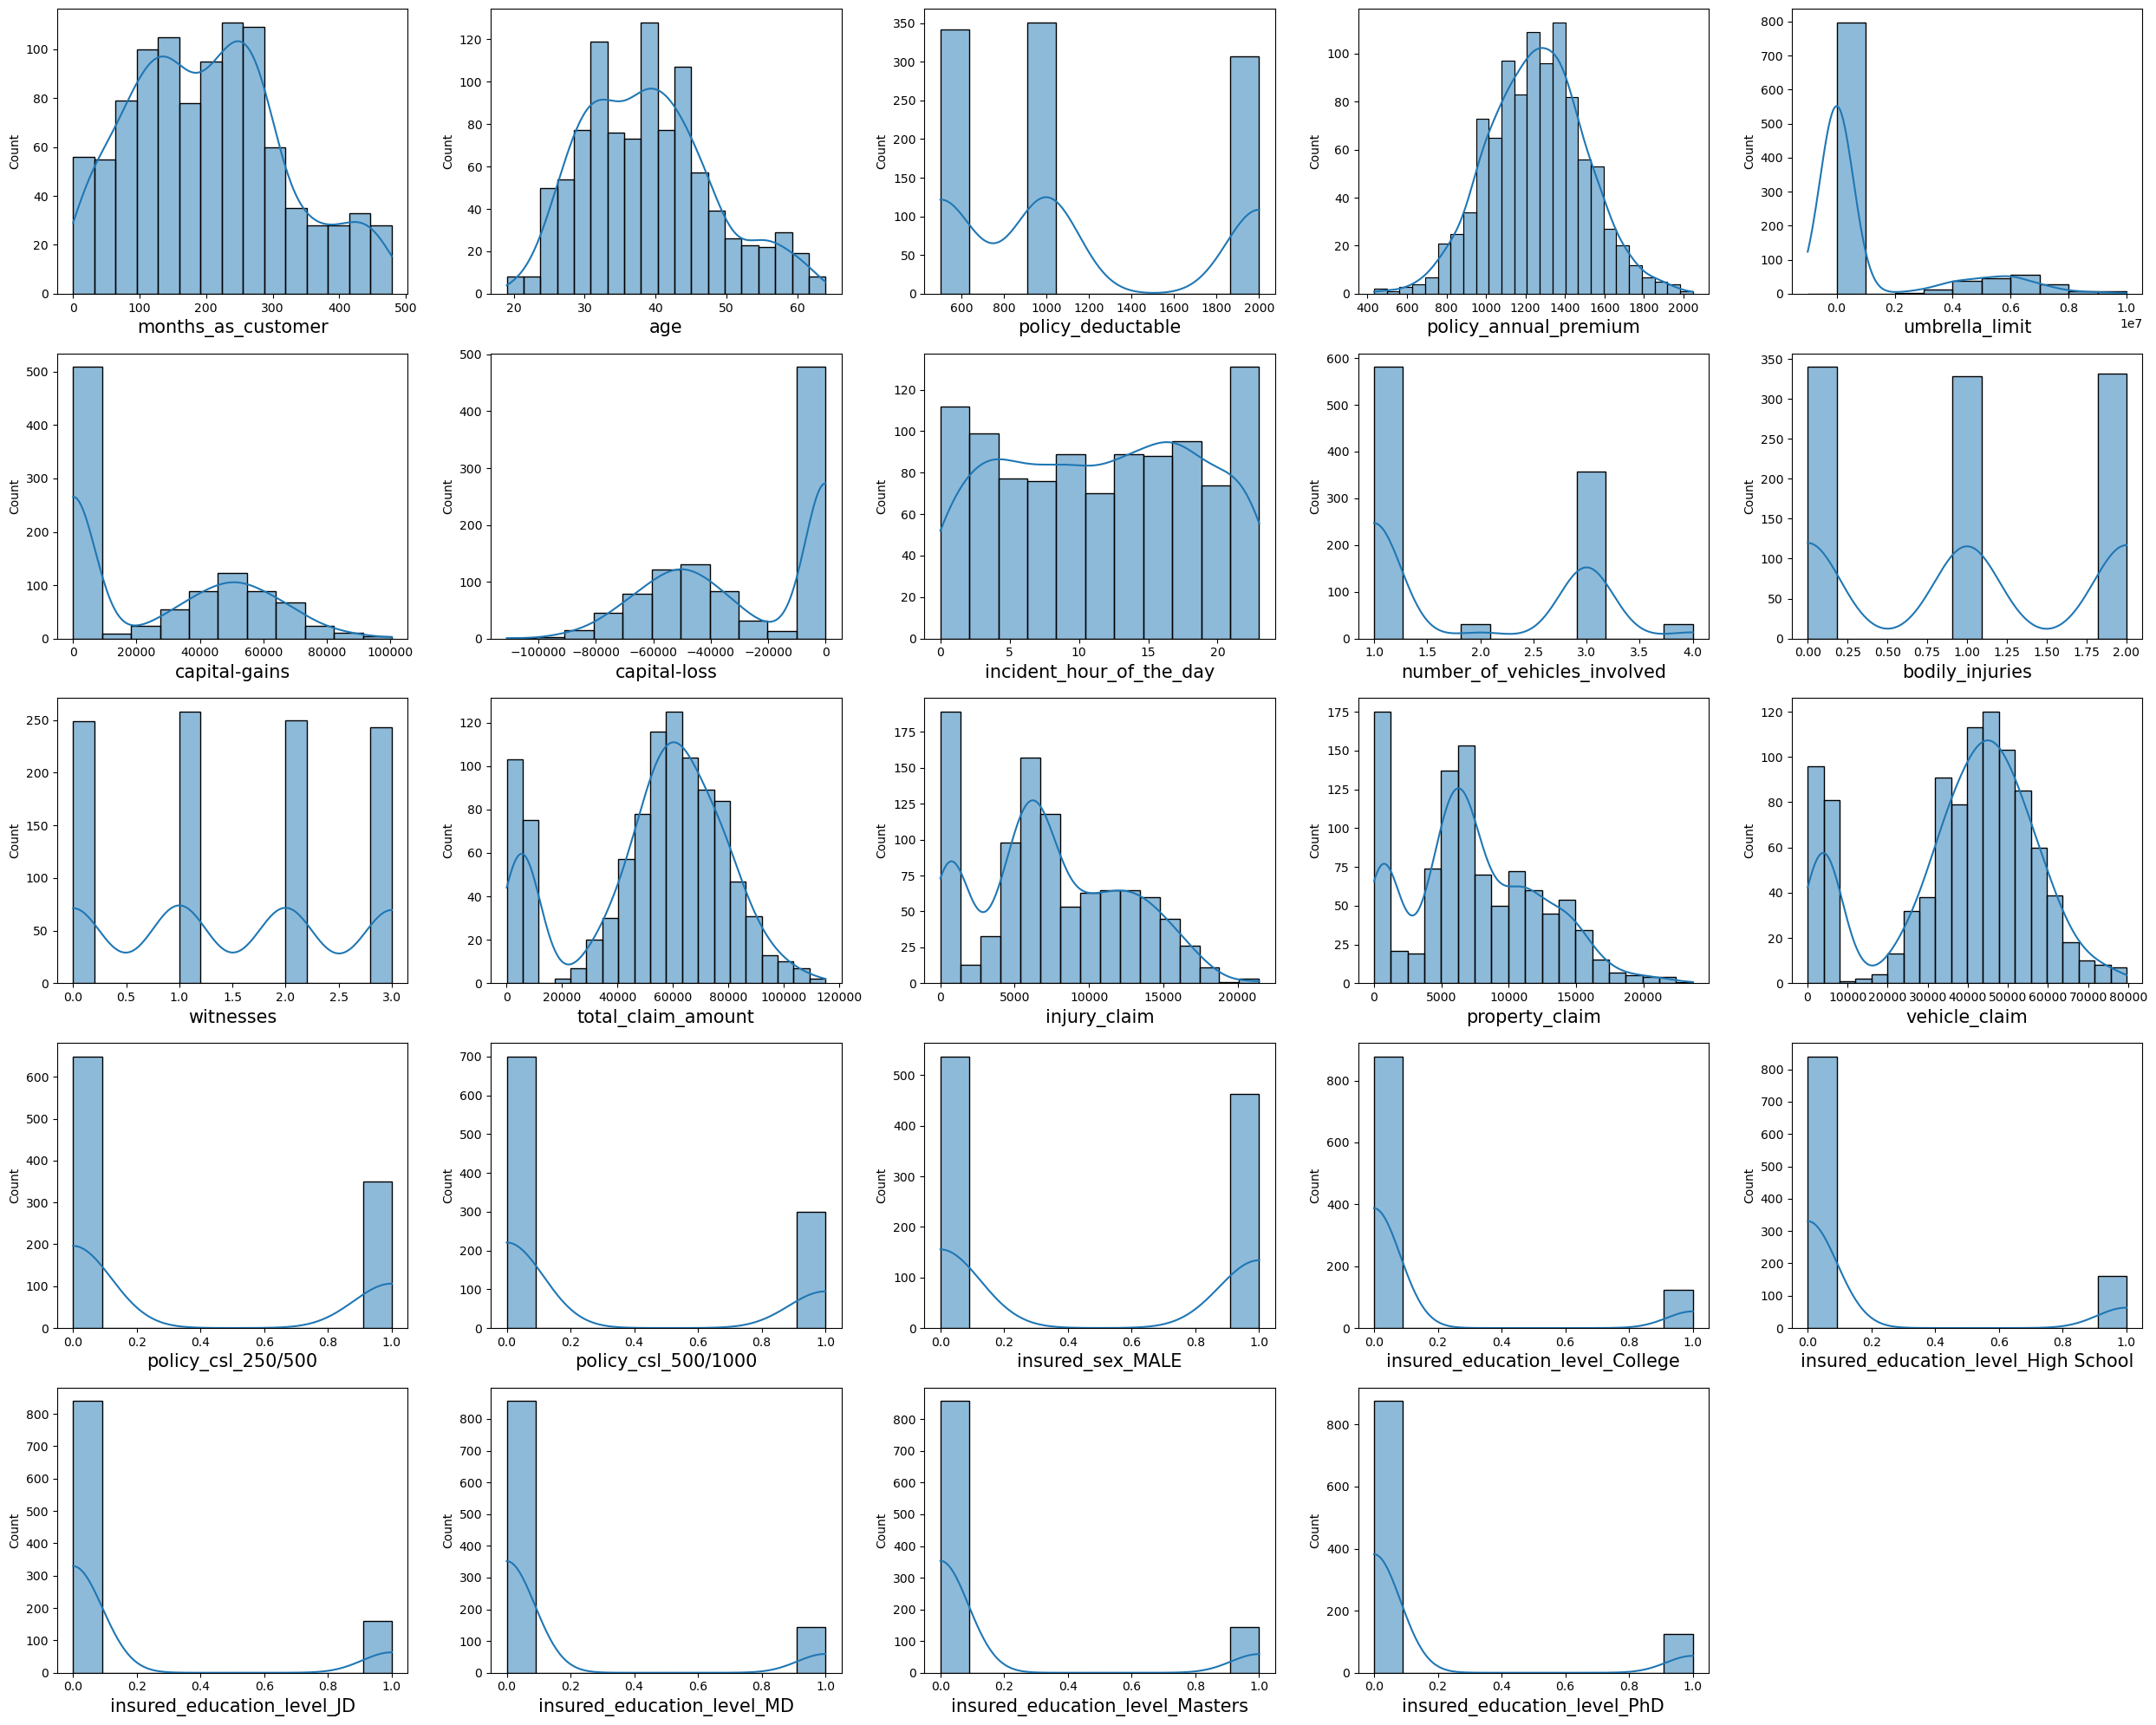

In [40]:
plt.figure(figsize=(25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.histplot(X[col], kde=True)  # kde=True adds a Kernel Density Estimate curve
        plt.xlabel(col, fontsize=15)

    plotnumber += 1

plt.tight_layout()
plt.show()


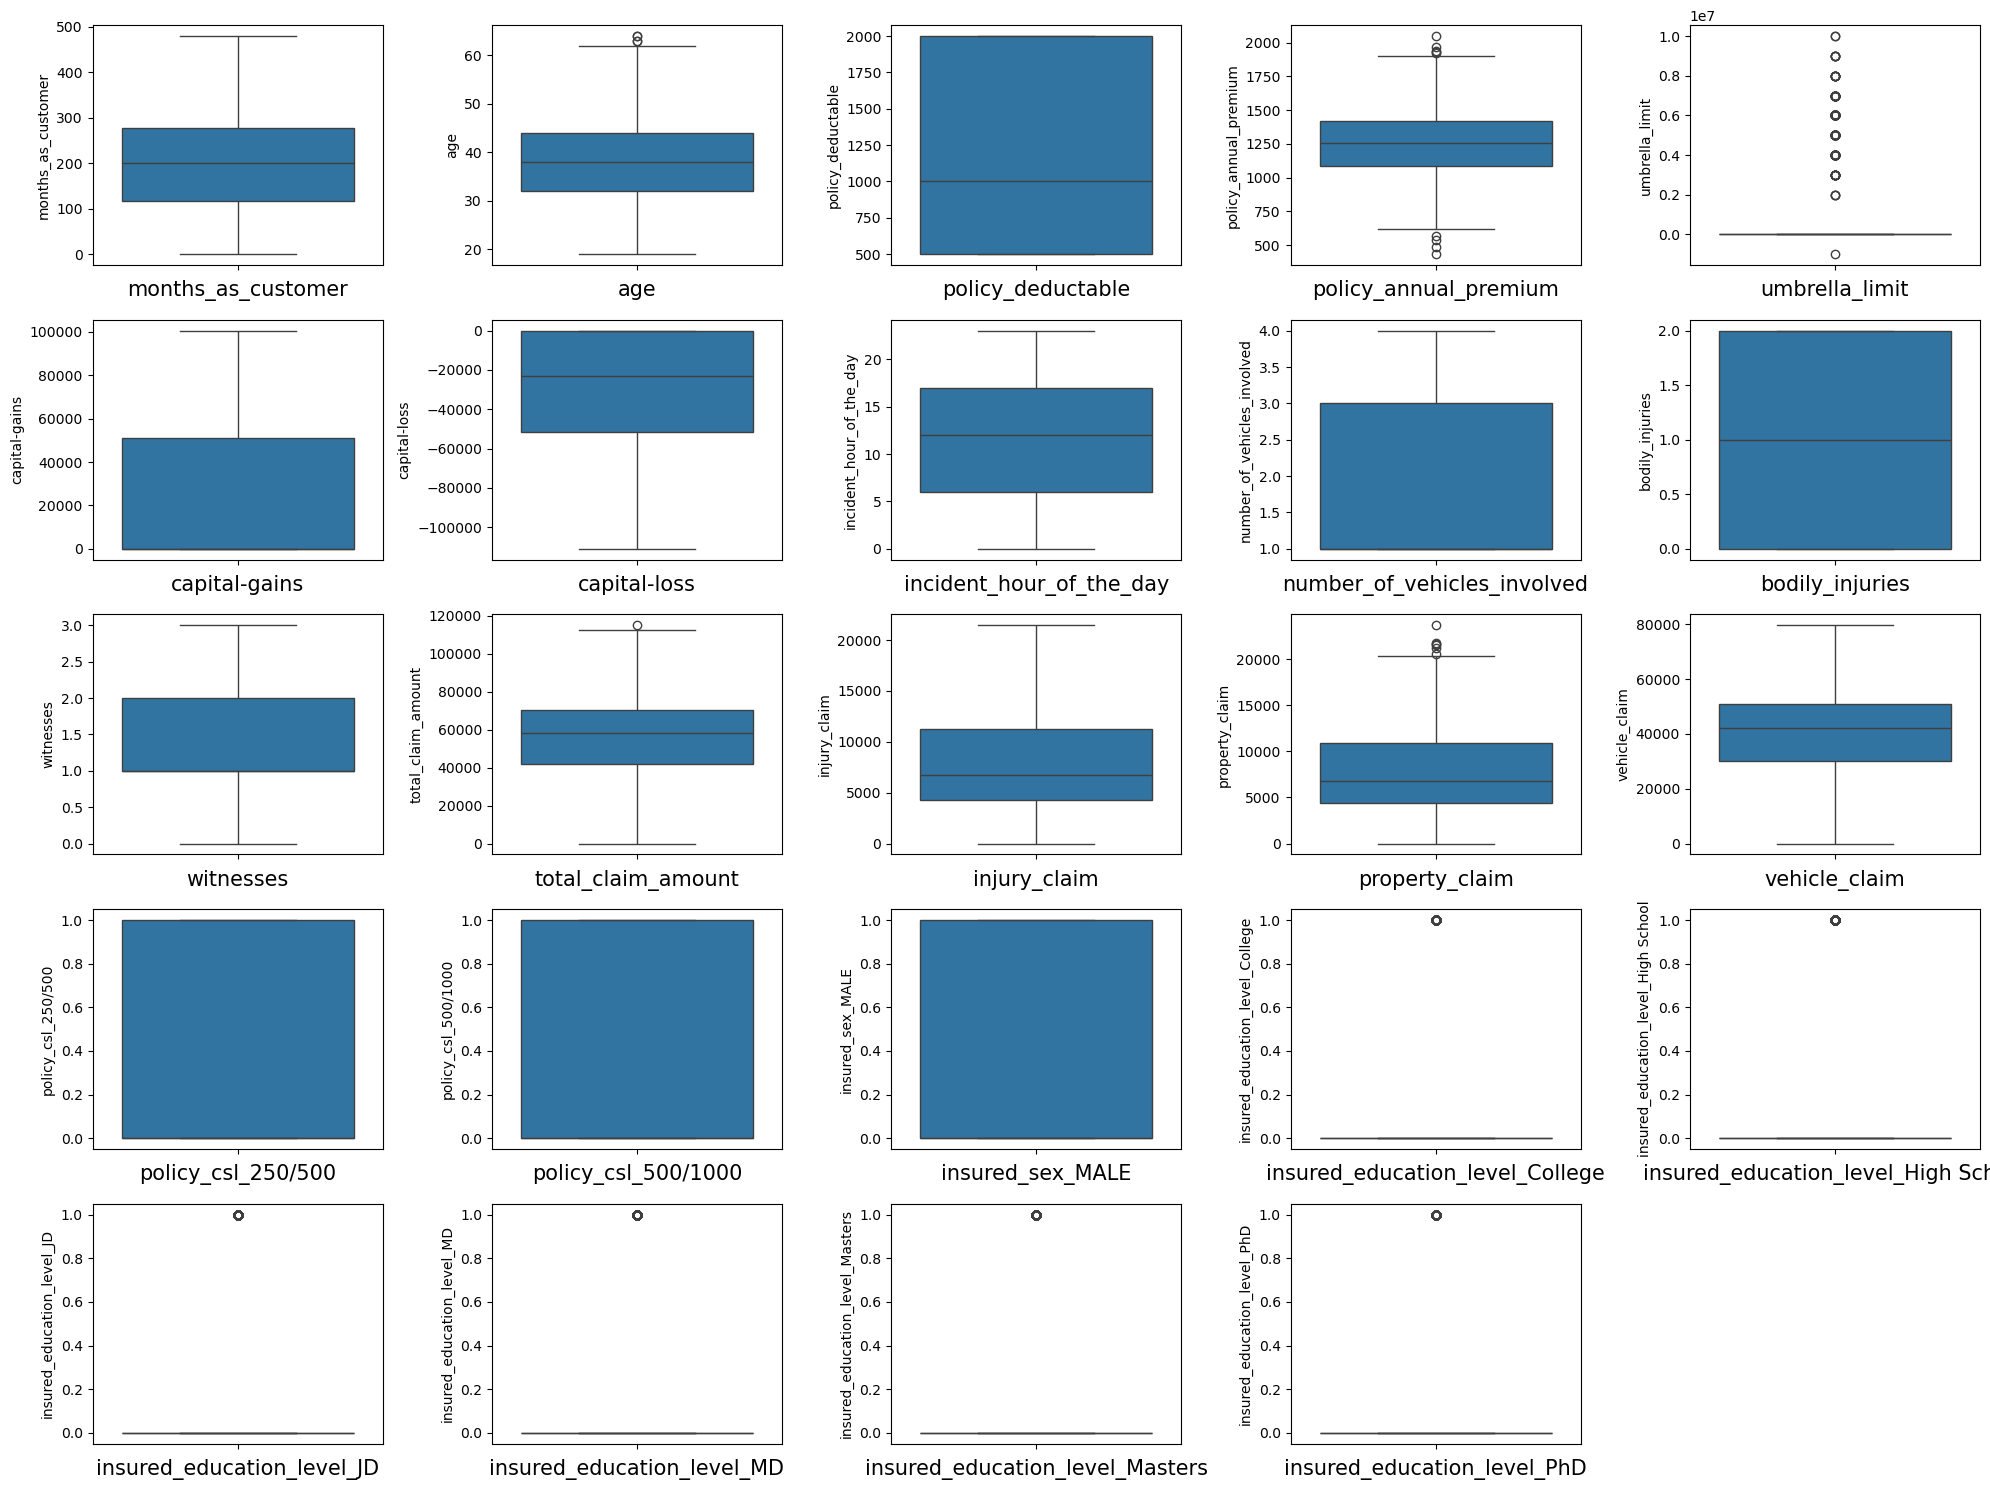

In [41]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are present in some numerical columns we will scale numerical columns later

In [42]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
870,260,43,500,982.22,0,54500,-72100,18,1,1,...,0,0,1,0,1,0,0,0,0,0
336,176,39,500,1365.46,4000000,0,-56600,14,3,2,...,1,1,0,0,1,0,0,0,0,0
361,61,24,500,922.67,0,47400,0,15,3,2,...,0,0,0,0,0,0,0,0,1,0
767,253,46,500,1358.20,0,52900,0,11,3,0,...,0,0,0,0,0,0,0,0,1,0
545,131,29,1000,978.27,0,65700,0,5,1,1,...,0,0,0,0,1,0,0,0,0,0


In [43]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [44]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
870,0.488400,-1.017077,-0.482974,1.089599,-1.641918,0.935135,-0.786413,0.017984,-1.322033,1.606833,0.040375,0.780326
336,-0.243329,-1.017077,1.241933,-0.871794,-1.088737,0.356940,1.202828,1.244154,-0.417357,-0.495759,-0.497316,-0.174773
361,-1.245101,-1.017077,-0.482974,0.834078,0.931267,0.501488,1.202828,1.244154,-0.417357,0.423090,0.413885,0.468903
767,0.427423,-1.017077,-0.482974,1.032017,0.931267,-0.076707,1.202828,-1.208186,-1.322033,-0.299159,0.902322,0.477236
545,-0.635327,-0.196854,-0.482974,1.492674,0.931267,-0.944001,-0.786413,0.017984,1.391995,1.648222,0.060897,0.816780


In [45]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)
X_train = pd.concat([scaled_num_df, X_train], axis = 1)
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
870,0.488400,-1.017077,-0.482974,1.089599,-1.641918,0.935135,-0.786413,0.017984,-1.322033,1.606833,...,0,0,1,0,1,0,0,0,0,0
336,-0.243329,-1.017077,1.241933,-0.871794,-1.088737,0.356940,1.202828,1.244154,-0.417357,-0.495759,...,1,1,0,0,1,0,0,0,0,0
361,-1.245101,-1.017077,-0.482974,0.834078,0.931267,0.501488,1.202828,1.244154,-0.417357,0.423090,...,0,0,0,0,0,0,0,0,1,0
767,0.427423,-1.017077,-0.482974,1.032017,0.931267,-0.076707,1.202828,-1.208186,-1.322033,-0.299159,...,0,0,0,0,0,0,0,0,1,0
545,-0.635327,-0.196854,-0.482974,1.492674,0.931267,-0.944001,-0.786413,0.017984,1.391995,1.648222,...,0,0,0,0,1,0,0,0,0,0


In [53]:

# Select the same numeric columns from X_test
num_df_test = X_test[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

# Scale the numeric values in the test dataset using the same scaler
scaled_data_test = scaler.transform(num_df_test)

# Create a DataFrame for the scaled data with the same columns and index as X_test
scaled_num_df_test = pd.DataFrame(data = scaled_data_test, columns = num_df_test.columns, index = X_test.index)

# Drop the original numeric columns from X_test and concatenate the scaled columns
X_test.drop(columns = scaled_num_df_test.columns, inplace = True)
X_test = pd.concat([scaled_num_df_test, X_test], axis = 1)

X_test.head()  # Display the first few rows of the scaled test dataset


,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
978,-1.001191,-0.196854,-0.482974,0.121498,0.931267,-0.076707,-0.786413,1.244154,1.391995,1.668917,...,0,0,1,0,0,0,1,0,0,1
331,0.688755,1.443593,-0.482974,1.053610,-1.695452,-1.233099,1.202828,0.017984,1.391995,-0.052890,...,0,0,0,0,0,0,0,0,0,0
880,-0.722437,-1.017077,-0.482974,-0.871794,0.931267,-0.076707,-0.786413,0.017984,-0.417357,-0.121183,...,0,0,0,0,1,0,0,0,0,0
981,-1.340923,1.443593,-0.482974,-0.871794,-1.417077,0.501488,1.202828,0.017984,0.487319,-0.249491,...,0,0,1,0,0,0,0,1,0,0
142,-0.713726,-0.196854,-0.482974,1.237153,-0.093011,-0.944001,-0.786413,1.244154,-0.417357,-1.122812,...,0,1,0,0,0,1,0,0,0,1


# Models


## KNN

In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 978 to 713
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      250 non-null    float64
 1   policy_deductable                       250 non-null    float64
 2   umbrella_limit                          250 non-null    float64
 3   capital-gains                           250 non-null    float64
 4   capital-loss                            250 non-null    float64
 5   incident_hour_of_the_day                250 non-null    float64
 6   number_of_vehicles_involved             250 non-null    float64
 7   bodily_injuries                         250 non-null    float64
 8   witnesses                               250 non-null    float64
 9   injury_claim                            250 non-null    float64
 10  property_claim                          250 non-null    float64
 

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 870 to 252
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      750 non-null    float64
 1   policy_deductable                       750 non-null    float64
 2   umbrella_limit                          750 non-null    float64
 3   capital-gains                           750 non-null    float64
 4   capital-loss                            750 non-null    float64
 5   incident_hour_of_the_day                750 non-null    float64
 6   number_of_vehicles_involved             750 non-null    float64
 7   bodily_injuries                         750 non-null    float64
 8   witnesses                               750 non-null    float64
 9   injury_claim                            750 non-null    float64
 10  property_claim                          750 non-null    float64
 

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [56]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.736
Test accuracy of KNN is : 0.784
[[196   3]
 [ 51   0]]
              precision    recall  f1-score   support

           N       0.79      0.98      0.88       199
           Y       0.00      0.00      0.00        51

    accuracy                           0.78       250
   macro avg       0.40      0.49      0.44       250
weighted avg       0.63      0.78      0.70       250



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Support Vector Classifier

In [59]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.7386666666666667
Test accuracy of Support Vector Classifier is : 0.796
[[199   0]
 [ 51   0]]
              precision    recall  f1-score   support

           N       0.80      1.00      0.89       199
           Y       0.00      0.00      0.00        51

    accuracy                           0.80       250
   macro avg       0.40      0.50      0.44       250
weighted avg       0.63      0.80      0.71       250



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest Classifier 

In [60]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9706666666666667
Test accuracy of Random Forest is : 0.804
[[192   7]
 [ 42   9]]
              precision    recall  f1-score   support

           N       0.82      0.96      0.89       199
           Y       0.56      0.18      0.27        51

    accuracy                           0.80       250
   macro avg       0.69      0.57      0.58       250
weighted avg       0.77      0.80      0.76       250



## Gradient Boosting Classifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.9426666666666667
Test Accuracy of Gradient Boosting Classifier is 0.792 

Confusion Matrix :- 
[[179  20]
 [ 32  19]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.85      0.90      0.87       199
           Y       0.49      0.37      0.42        51

    accuracy                           0.79       250
   macro avg       0.67      0.64      0.65       250
weighted avg       0.77      0.79      0.78       250



# Models Comparison

In [63]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boost'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc, gb_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,0.804
0,SVC,0.796
4,Gradient Boost,0.792
1,KNN,0.784
2,Decision Tree,0.724


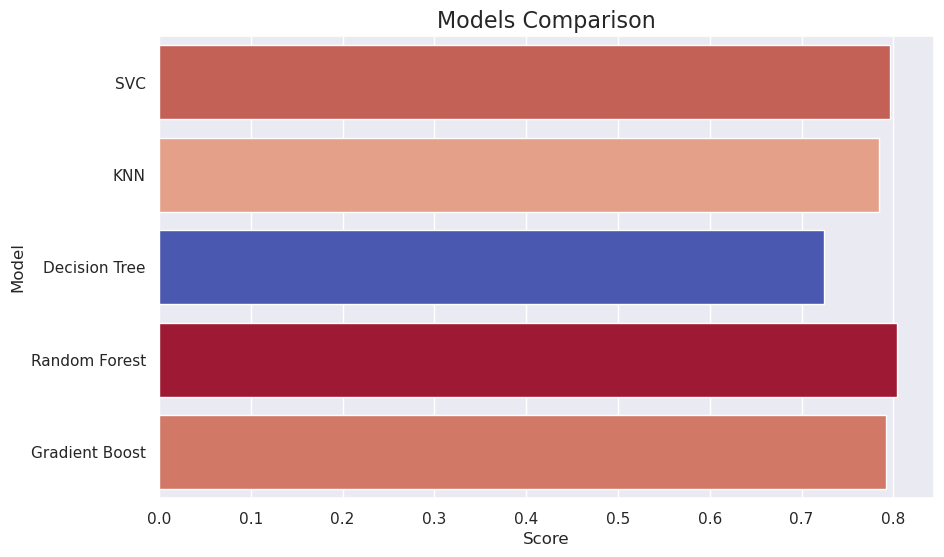

In [68]:
# Set the style and palette for the plot
sns.set(style="darkgrid", palette="dark")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=models, x='Score', y='Model', hue='Score', palette="coolwarm", legend=False)

# Add title and labels
plt.title('Models Comparison', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Model', fontsize=12)

# Show the plot
plt.show()